In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
data = pd.read_csv('bmi.csv')

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the data

numerical_columns = ['Height', 'Weight', 'bmi', 'Age']

# Mean
mean_values = data[numerical_columns].mean()

# Median
median_values = data[numerical_columns].median()

# Mode (with handling for multiple modes and cleaner output)
mode_values = data[numerical_columns].mode().iloc[0]  # Select the first row for modes
mode_values_dict = mode_values.to_dict()  # Convert to dictionary for cleaner output

# Display results
print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values_dict)  # Print the dictionary of mode values


Mean:
 Height    168.222222
Weight     73.888889
bmi        26.177778
Age        28.333333
dtype: float64

Median:
 Height    174.0
Weight     70.0
bmi        26.1
Age        28.0
dtype: float64

Mode:
 {'Height': 174.0, 'Weight': 70.0, 'bmi': 22.3, 'Age': 27.0}


Measures of Spread and Quartiles:

        Q1 (25th Percentile)  Median (Q2, 50th Percentile)  \
Height                 154.0                         174.0   
Weight                  65.0                          70.0   
bmi                     24.4                          26.1   
Age                     27.0                          28.0   

        Q3 (75th Percentile)  IQR (Q3 - Q1)    Variance  Standard Deviation  \
Height                 177.0           23.0  236.194444           15.368619   
Weight                  80.0           15.0  115.361111           10.740629   
bmi                     27.5            3.1    6.966944            2.639497   
Age                     30.0            3.0    5.500000            2.345208   

        Range  
Height   42.0  
Weight   29.0  
bmi       7.8  
Age       7.0  


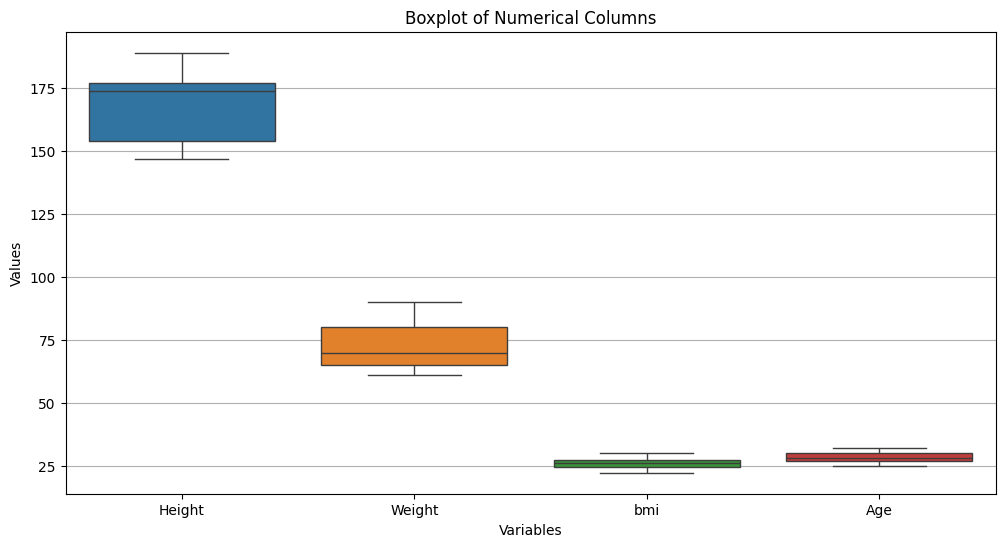

In [ ]:
# Select numerical columns for analysis
numerical_columns = ['Height', 'Weight', 'bmi', 'Age']

# Measures of Spread and Quartiles
spread_stats = {}
for col in numerical_columns:
    q1 = np.percentile(data[col], 25)  # 25th percentile (Q1)
    q2 = np.percentile(data[col], 50)  # 50th percentile (Median or Q2)
    q3 = np.percentile(data[col], 75)  # 75th percentile (Q3)
    spread_stats[col] = {
        'Q1 (25th Percentile)': q1,
        'Median (Q2, 50th Percentile)': q2,
        'Q3 (75th Percentile)': q3,
        'IQR (Q3 - Q1)': q3 - q1,  # Interquartile range
        'Variance': np.var(data[col], ddof=1),  # Sample variance
        'Standard Deviation': np.std(data[col], ddof=1),  # Sample standard deviation
        'Range': data[col].max() - data[col].min(),  # Range
    }

# Display calculated measures
spread_stats_df = pd.DataFrame(spread_stats).T
print("Measures of Spread and Quartiles:\n")
print(spread_stats_df)

# Boxplot to visualize the spread
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_columns])
plt.title("Boxplot of Numerical Columns")
plt.xlabel("Variables")
plt.ylabel("Values")
plt.grid(True, axis='y')
plt.show()

Measures of Shape (Skewness and Kurtosis):

        Skewness  Kurtosis
Height -0.175894 -1.351014
Weight  0.240826 -1.372808
bmi     0.150582 -1.002889
Age     0.191871 -1.146694


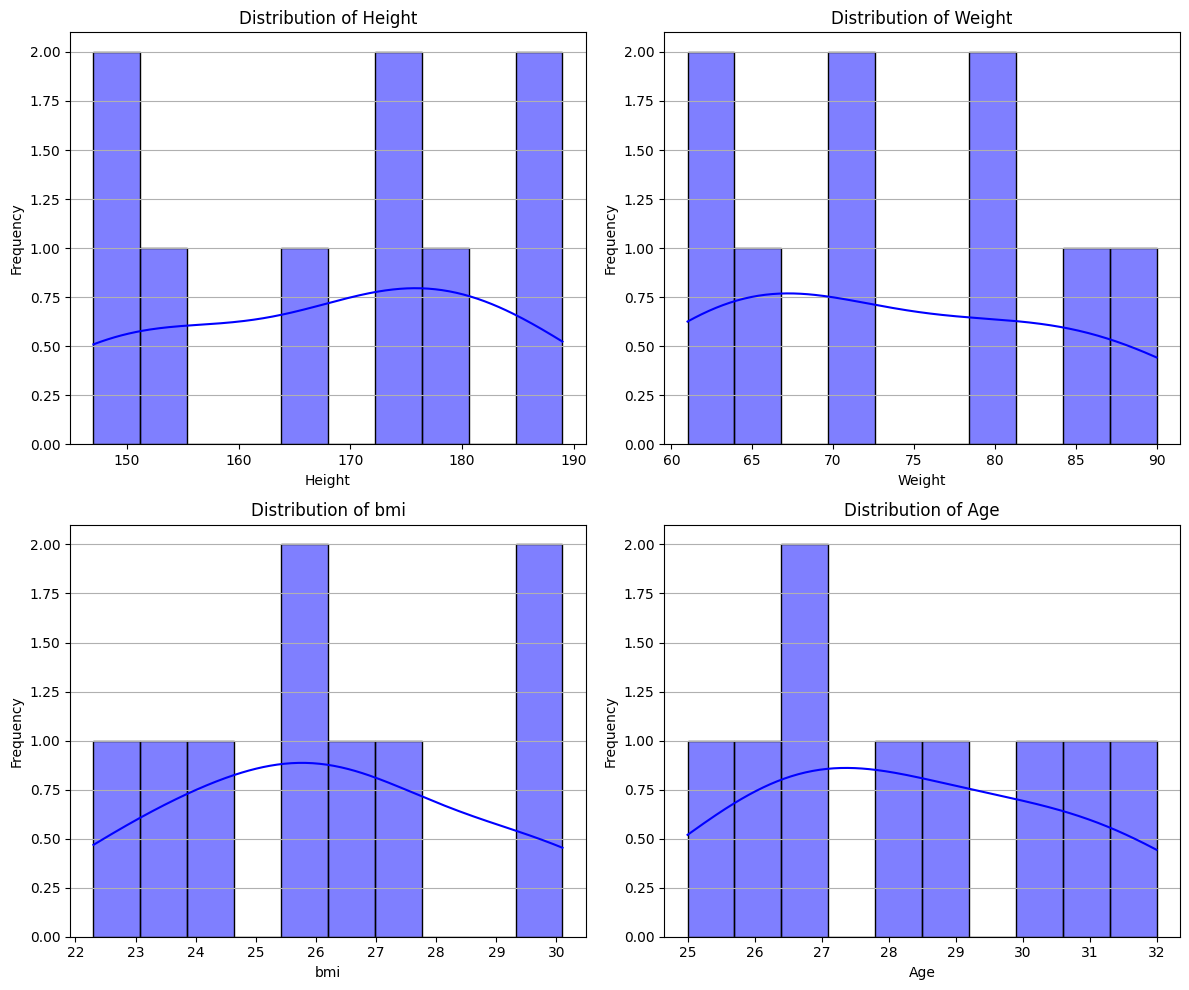

In [ ]:
numerical_columns = ['Height', 'Weight', 'bmi', 'Age']

# Measures of Shape: Skewness and Kurtosis
shape_stats = {}
for col in numerical_columns:
    shape_stats[col] = {
        'Skewness': skew(data[col]),  # Measure of symmetry
        'Kurtosis': kurtosis(data[col]),  # Measure of tail heaviness (excess kurtosis)
    }

# Display calculated measures
shape_stats_df = pd.DataFrame(shape_stats).T
print("Measures of Shape (Skewness and Kurtosis):\n")
print(shape_stats_df)

# Visualizing the distribution of each column with histograms
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True, bins=10, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True, axis='y')
plt.tight_layout()
plt.show()